#   **Google Playstore Apps Data Analysis and Visualization**

#### Import the important libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Import the file from the provided path into a pandas data frame
df = pd.read_csv("../data/playstoreliveproj Drive FIle/playstoreliveproj/playstore_apps.csv")

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,07-01-2018,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,15-01-2018,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,01-08-2018,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0.0,Teen,Art & Design,08-06-2018,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,20-06-2018,1.1,4.4 and up


In [5]:
# View the size of the dataset
df.shape

(10841, 13)

In [79]:
# Insights about the columns of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10354 entries, 0 to 10355
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10354 non-null  object        
 1   Category        10354 non-null  object        
 2   Rating          10354 non-null  float64       
 3   Reviews         10354 non-null  float64       
 4   Size            10354 non-null  object        
 5   Installs        10354 non-null  float64       
 6   Type            10354 non-null  object        
 7   Price           10354 non-null  float64       
 8   Content Rating  10354 non-null  object        
 9   Genres          10354 non-null  object        
 10  Last Updated    10354 non-null  datetime64[ns]
 11  Current Ver     10354 non-null  object        
 12  Android Ver     10354 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 1.1+ MB


In [7]:
# Check for Null Values Count In Our Dataset
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              1
Size                 0
Installs             1
Type                 1
Price                1
Content Rating       1
Genres               0
Last Updated         1
Current Ver          8
Android Ver          3
dtype: int64

<AxesSubplot:>

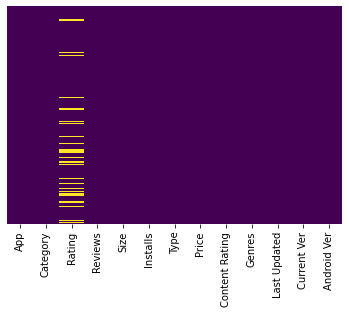

In [8]:
# Visualize the distribution of NaN data points over the dataset
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis', )  

In [10]:
# Describe the basic properties of the numerical columns in the dataset such as mean, median, standard deviatio(std)
df.describe()

,Rating,Reviews,Installs,Price
count,9367.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.193338,4.441529e+05,1.546434e+07,1.027368
std,0.537431,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,19.000000,7.815831e+07,1.000000e+09,400.000000


#### Treating Duplicate Values in the dataset

In [11]:
df.drop_duplicates(keep='first', inplace=True)

In [12]:
# Reset the index after dropping the duplicates in the dataset
df = df.reset_index(drop = True)

In [13]:
df.shape

(10358, 13)

#### Treat the unique values in each column

In [14]:
# Get the unique values from the Category table
print(df['Category'].unique())

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


##### In the above case we can see that 1.9 is an outlier and we do not expect the Category column to have such value thus we need to drop all rows having that value and drop them

In [15]:
ind = df[df['Category']=='1.9'].index
df.drop(ind, inplace=True)

In [16]:
# Reset the index after dropping the outlier row
df = df.reset_index(drop = True)

In [17]:
## Check for 1.9 in the Category column
print(df['Category'].unique())

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


In [18]:
# Check for unique values in the Type Column
print(df['Type'].unique())

['Free' 'Paid' nan]


In [19]:
ind = []
ind = df[df['Type'].isna() == True].index
df.drop(ind, inplace=True)

In [20]:
# Resetting the index after droping a column
df = df.reset_index(drop = True)

In [21]:
## Check for the uniqueness of the Type column
print(df['Type'].unique())

['Free' 'Paid']


In [22]:
# Check for unique value in the Content Rating Column
print(df['Content Rating'].unique())

['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']


In [23]:
# Check for unique values in the Genres Column
print(df['Genres'].unique())

['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Art & Design;Action & Adventure' 'Auto & Vehicles' 'Beauty'
 'Books & Reference' 'Business' 'Comics' 'Comics;Creativity'
 'Communication' 'Dating' 'Education;Education' 'Education'
 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Music & Video'
 'Entertainment;Brain Games' 'Entertainment;Creativity' 'Events' 'Finance'
 'Food & Drink' 'Health & Fitness' 'House & Home' 'Libraries & Demo'
 'Lifestyle' 'Lifestyle;Pretend Play' 'Adventure;Action & Adventure'
 'Arcade' 'Casual' 'Card' 'Casual;Pretend Play' 'Action' 'Strategy'
 'Puzzle' 'Sports' 'Music' 'Word' 'Racing' 'Casual;Creativity'
 'Casual;Action & Adventure' 'Simulation' 'Adventure' 'Board' 'Trivia'
 'Role Playing' 'Simulation;Education' 'Action;Action & Adventure'
 'Casual;Brain Games' 'Simulation;Action & Adventure'
 'Educational;Creativity' 'Puzzle

In [24]:
# Since there are many values and hard to check them so look for indecies of rows having null on the Genres column
ind = []
ind = df[df['Genres'].isnull() == True].index
print(ind)

Int64Index([], dtype='int64')


<AxesSubplot:>

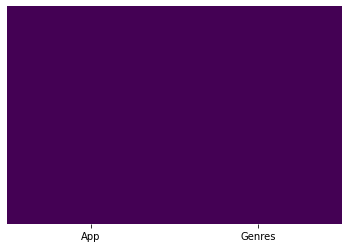

In [25]:
# Visually Check the that no null value is in the Generes Column
Rating_df = df[["App", "Genres"]].copy()
sns.heatmap(Rating_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### 1, As the rating can be a float value treat the null values of the rating column to with the median of the column

In [26]:
df.isnull().sum()

App                  0
Category             0
Rating            1464
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

<AxesSubplot:>

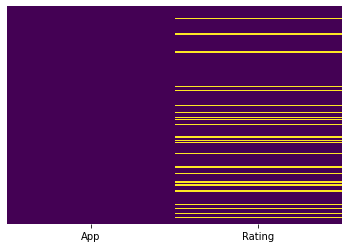

In [27]:
# Visualize the null points of the data set for each column having null values
Rating_df = df[["App", "Rating"]].copy()
sns.heatmap(Rating_df.isnull(),yticklabels=False,cbar=False,cmap='viridis') 

##### As we can see from the result above we have 1464 rows having null values in the Rating column thus dropping these rows would wash an important information from our dataset thus We will be filling them with the mean of Rating for each app

In [28]:
df.shape

(10356, 13)

In [29]:
ind = []
ind = df[df['Rating'].isnull() == True].index
print(ind)

Int64Index([   23,   113,   123,   126,   129,   130,   134,   163,   180,
              185,
            ...
            10331, 10333, 10336, 10337, 10338, 10339, 10340, 10346, 10350,
            10353],
           dtype='int64', length=1464)


c:\Users\mikyg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating'>

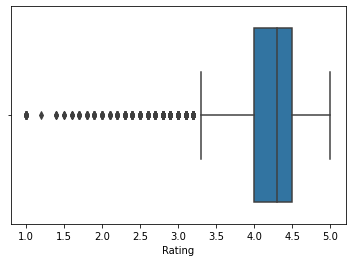

In [30]:
# Before using any techinique to treat NaN values in the Rating Folder We need to see the How bad is the Rating column affeted by outliers
# since great number of rows are having NaN values we need to take care of the data quality
import seaborn as sns
sns.boxplot(df['Rating'])

In [31]:
# Use the IQR Technique to treat outliers in the dataset
Q1=df['Rating'].quantile(0.25)
Q3=df['Rating'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - (1.5*IQR)
Upper_Whisker = Q3 + (1.5*IQR)
print(Lower_Whisker, Upper_Whisker)

4.0
4.5
0.5
3.25 5.25


In [32]:
# From the Figure above and the results of the IQR calculation we can count the number of data points in the outlier range
# Let see how many outliers we have
counted = df[df['Rating'] < Lower_Whisker].count(axis = 0)
print(counted['Rating'])

495


In [33]:
# From here we can see that 495 rows are having values below the 1.5*IQR thus we are now chosing from filling them using the mean or the median
# For the seak of sticking to the best practices if our data or column is highly affected by outliers the median is the best option to go with
df['Rating'].fillna(df['Rating'].median(), inplace = True)

In [34]:
# Check for null values again
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

<AxesSubplot:>

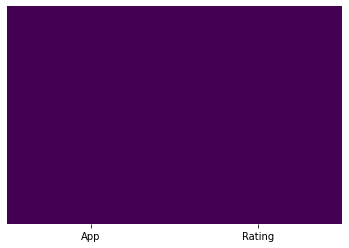

In [35]:
#Visual Check
Rating_df = df[["App", "Rating"]].copy()
sns.heatmap(Rating_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### 2, Delete the row with a null value for columns with datatype text or string

In [36]:
# So, First let us check the data types of the columns in the dataframe
df.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size               object
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [37]:
# Then let us extract the str(text) object types
col = [col for col, dt in df.dtypes.items() if dt == object]
print(col)

['App', 'Category', 'Size', 'Type', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [38]:
col_info = []
for i in col:
    col_info.append(df[i].isnull().sum())

print(col_info)

[0, 0, 0, 0, 0, 0, 0, 8, 2]


<AxesSubplot:>

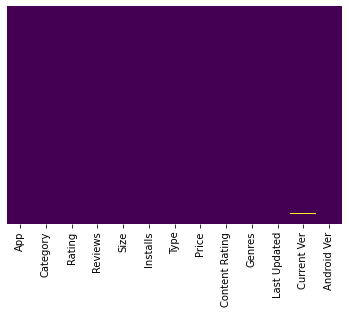

In [39]:
# Visual Check
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [40]:
# From the the above result we can see that columns
# 1) Current Ver
# 2) Android Ver
# Therefore treat the null values in the Android Ver Column == Remove(Delete) the coresponding row
df.drop(df[df['Android Ver'].isnull() == True].index, axis = 0, inplace=True)


In [41]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       0
dtype: int64

#### 3, For column current ver if there is any null value, fill it using the forward filling technique since there are only eight columns missing values for current ver column        

In [42]:
df['Current Ver'].isnull().sum()

8

In [43]:
## For this question we assumed droping this values is not an apprpriate decision so we assumed forawrd filling the null values
df['Current Ver'].fillna(method='ffill', inplace=True)

In [44]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [81]:
df.shape

(10354, 13)

<AxesSubplot:>

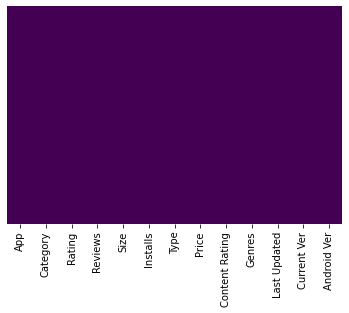

In [45]:
# Visual check
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

##### We can see that now we have the cleanest dataset

#### 4, Since the data type of the Last updated column is of a str we need to convert it into a date time for fromating it so that can be stored in the sql database

In [46]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

c:\Users\mikyg\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15-01-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\mikyg\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '20-06-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\mikyg\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-03-2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\mikyg\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-04-2018' in DD/MM/YYYY format. Provide format or specif

In [58]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,2018-07-01,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,2018-01-08,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0.0,Teen,Art & Design,2018-08-06,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


#### Subtask 4: Encoding data into suitable format


In [78]:
# Since the default encoding used by pd.to_csv() method is UTF-8
df.to_csv('../data/by guide/cleaned_play_store_data.csv')